# Introduction to NLP fundamentals in TensorFlow

NLP has the goal of deriving information out of natural language (could be sequences text or speech)

Another common term for NLP problems is sequence  to sequence problems(seq2seq)

In [ ]:
# Get the helper functin
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-07-19 17:13:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-19 17:13:15 (76.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

#Unzip data
unzip_data("nlp_getting_started.zip")

--2024-07-19 17:13:28--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2024-07-19 17:13:28 (32.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualizing text dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# what does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize random training examples
import random
random_index = random.randint(0, len(train_df)-5)  # create random indexes not higher thant he total number of samples

# Loop through the 5 consecutive rows starting from random_index
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
    _, text, target = row   # Unpack the row tuple into index (ignored), text, and target
    print(f"Target: {target}", "(real diaster)" if target > 0 else "(not real diaster)")        # Print the target and a corresponding message
    print(f"Text:\n{text}\n")       # Print the text of the training example
    print("---\n")

Target: 1 (real diaster)
Text:
What tropical storm? #guillermo by hawaiianpaddlesports http://t.co/LgPgAjgomY http://t.co/FKd1mBTB68

---

Target: 1 (real diaster)
Text:
Los Angeles Times: Arson suspect linked to 30 fires caught in Northern ... - http://t.co/xwMs1AWW8m #NewsInTweets http://t.co/TE2YeRugsi

---

Target: 0 (not real diaster)
Text:
You May Know Me from Such Roles as Terrorist #4 http://t.co/xImPncZXtH

---

Target: 0 (not real diaster)
Text:
she keep it wet like tsunami.

---

Target: 0 (not real diaster)
Text:
Paul Rudd Emile Hirsch David Gordon Green 'Prince Avalanche' Q&amp;A | Filmmakers at Google http://t.co/e4QonKzndZ  #entretenimento #Video

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)


In [ ]:
# Check the lengths

len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers

When dealing with a text problem, one of the first things we'll have to do before we can build a model is to convert our text to numbers

There are a few ways to do this:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

----------------------------------------------------------------------

* Tokenization: The process of splitting text into smaller units (tokens) like words, subwords, or characters.
* Text Vectorization: Converting tokens into numerical vectors using techniques like Bag of Words, TF-IDF, or embeddings.
* Word Embeddings: Represent words in a continuous vector space, capturing semantic relationships. Examples include Word2Vec, GloVe, FastText, and contextual embeddings like BERT and GPT.

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
# Find the average number of tokens (words) is the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000    # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (eg. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 @soonergrunt better than tornado!      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[8292,  441,   76,  496,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_voocab = text_vectorizer.get_vocabulary()  # get all the unique words in the training data
top_5_words = words_in_voocab[:5] # Get the most common words
bottom_5_words = words_in_voocab[-5:] # get the least common words
print(f"Number of words vocab: {len(words_in_voocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding layer

To make our embedding, we're going to use the embedding layer:
* **input_dim** = the size of our vocabulary
* **output_dim** = the size of the output embedding vector, for example, a value of 100 would mean each token gets repressented by a vector of 100 words long
* **input_length** = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # Set input shape
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 People donå«t want to hear the truth because they donå«t want  their illusions destroyed. #FN.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00689856,  0.0347127 ,  0.00789549, ..., -0.00479926,
         -0.02497683, -0.01685917],
        [ 0.04137461, -0.02879122,  0.03280176, ..., -0.03019167,
         -0.03080065,  0.03153649],
        [ 0.02455944,  0.01936349,  0.03307531, ..., -0.03843743,
          0.01435519,  0.01693432],
        ...,
        [-0.02699534,  0.00966625, -0.01288546, ..., -0.0137104 ,
          0.00602257,  0.01411721],
        [-0.00014148, -0.00639771,  0.04725731, ..., -0.01346161,
          0.01477886, -0.03407141],
        [-0.02699534,  0.00966625, -0.01288546, ..., -0.0137104 ,
          0.00602257,  0.01411721]]], dtype=float32)>

In [ ]:
# Check out a simgle token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 6.8985596e-03,  3.4712698e-02,  7.8954920e-03,  1.3728712e-02,
         4.9856193e-03,  3.0220676e-02,  4.9173977e-02,  4.2240310e-02,
        -4.9484160e-02,  4.0444974e-02,  4.2479049e-02,  2.4318695e-03,
        -3.1461313e-02, -5.1379427e-03, -2.5106801e-02,  5.5554509e-03,
        -2.2630207e-03,  4.5392383e-02, -3.8341332e-02, -1.5810668e-02,
        -1.8490478e-04,  1.2590770e-02,  6.7936294e-03, -4.3259241e-02,
         2.9538620e-02, -2.5132610e-02, -2.8387893e-02,  4.6682779e-02,
        -1.6970564e-02,  4.8220430e-02, -7.7150762e-05,  1.2265753e-02,
        -2.9482652e-02, -4.9795534e-02,  4.7690522e-02,  8.4405914e-03,
        -4.2795207e-02,  1.6197506e-02, -3.9989281e-02,  3.7352335e-02,
        -2.2091854e-02, -4.6464752e-02, -3.9290141e-02, -8.0325603e-03,
        -2.3465766e-02, -6.0487390e-03, -2.5577320e-02, -2.8098226e-03,
         4.3959543e-04,  9.7948909e-03, -2.7454579e-02, -4.7511734e-02,
         7.4030

## Modelling a text dataset (running a series of experiment)

We'll start with baseline and move on from there.

* Model 0: Naive Bayes
* Model 1: Feed-forward neural network
* Model 2: LSTM (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutiional Neural Network (CNN)
* Model 6: TensorFlow Hub pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

Here we will use the standard steps in modelling with TensorFlow
* Create a model
* Build a model
* Fit a model
* Evaluate our model


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important too create a baseline model so we've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

> **Note:** It's common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see if we can improve upon them

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),   # convert words to numbers using tfidf
    ("clf", MultinomialNB())    # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model acheives an accuracy of: {baseline_score*100:.2f}%")


Our baseline model acheives an accuracy of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
train_labels

array([0, 0, 1, ..., 1, 1, 0])

### Creating an evaluation function for our model experiments

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall, f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: Feed-Forward Neural Network (dense model)

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240719-171334
Epoch 1/5
215/215 [==============================] - 16s 57ms/step - loss: 0.6099 - accuracy: 0.6914 - val_loss: 0.5353 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 10s 48ms/step - loss: 0.4422 - accuracy: 0.8180 - val_loss: 0.4722 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 10s 47ms/step - loss: 0.3475 - accuracy: 0.8586 - val_loss: 0.4571 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 9s 42ms/step - loss: 0.2842 - accuracy: 0.8907 - val_loss: 0.4644 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2382 - accuracy: 0.9130 - val_loss: 0.4817 - val_accuracy: 0.7874


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.7874


[0.4817281663417816, 0.787401556968689]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
model_1_pred_probs[:10]

array([[0.34514126],
       [0.67487204],
       [0.9974904 ],
       [0.11618819],
       [0.10573648],
       [0.9327916 ],
       [0.9053585 ],
       [0.993599  ],
       [0.9619808 ],
       [0.27408728]], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)

model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7932296029485675,
 'recall': 0.7874015748031497,
 'f1': 0.7841130596930417}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorizatin layer
words_in_voocab = text_vectorizer.get_vocabulary()
len(words_in_voocab), words_in_voocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representation of each token in ou training data, which have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


Now we've got the embedding matrix our model has learned to represent our token, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called projector

In [ ]:
# Create embedding files
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_voocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

## Recurrent Neural Networks (RNN's)

RNN's are useful for sequence data.

The premise of a recurrent neural network is to use the representation of a previous input to aid the representation later

Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:
 > Input(text) -> Tokenization -> Embedding -> Layers (RNN/dense) -> Output (label probibility)

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x)   # when we're stacking RNN cells together, we need to set return_sequences = True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240719-171502
Epoch 1/5
215/215 [==============================] - 16s 47ms/step - loss: 0.2187 - accuracy: 0.9229 - val_loss: 0.5914 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 10s 44ms/step - loss: 0.1585 - accuracy: 0.9426 - val_loss: 0.6802 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1291 - accuracy: 0.9518 - val_loss: 0.7575 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 9s 43ms/step - loss: 0.1095 - accuracy: 0.9577 - val_loss: 0.8933 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0815 - accuracy: 0.9675 - val_loss: 1.0667 - val_accuracy: 0.7703


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[6.1441511e-03],
       [9.1165930e-01],
       [9.9998665e-01],
       [1.2063110e-01],
       [6.6851157e-05],
       [9.9969804e-01],
       [8.9518309e-01],
       [9.9999440e-01],
       [9.9998128e-01],
       [4.1019908e-01]], dtype=float32)

In [ ]:
# Comvert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.03412073490814,
 'precision': 0.7726339681635592,
 'recall': 0.7703412073490814,
 'f1': 0.7679241301282296}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 3: GRU cell powered RNN

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.


In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)    # if we want to stack recurrent layers on top of each other, we need return_sequences=True
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            24960     
                                                       

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])


Saving TensorBoard log files to: model_logs/model_3_GRU/20240719-171631
Epoch 1/5
215/215 [==============================] - 20s 59ms/step - loss: 0.1732 - accuracy: 0.9435 - val_loss: 0.7106 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 12s 54ms/step - loss: 0.0914 - accuracy: 0.9634 - val_loss: 1.0228 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 12s 55ms/step - loss: 0.0748 - accuracy: 0.9682 - val_loss: 1.2998 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 12s 54ms/step - loss: 0.0619 - accuracy: 0.9724 - val_loss: 1.2491 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 12s 54ms/step - loss: 0.0520 - accuracy: 0.9762 - val_loss: 1.5890 - val_accuracy: 0.7730


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 2s 15ms/step


array([[2.3699651e-04],
       [9.8598725e-01],
       [9.9999744e-01],
       [3.2954719e-02],
       [1.4303280e-05],
       [9.9991059e-01],
       [9.9870622e-01],
       [1.0000000e+00],
       [9.9999934e-01],
       [4.7083241e-01]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'precision': 0.7770640736660165,
 'recall': 0.7729658792650919,
 'f1': 0.7698502254147366}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 4: Bi-directional RNN

Normal RNN go from left to right. But Bidirectional goes both direction

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")


In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                             

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])


Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240719-171803
Epoch 1/5
215/215 [==============================] - 24s 75ms/step - loss: 0.1037 - accuracy: 0.9657 - val_loss: 1.0694 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 20s 93ms/step - loss: 0.0548 - accuracy: 0.9749 - val_loss: 1.2721 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 15s 68ms/step - loss: 0.0448 - accuracy: 0.9759 - val_loss: 1.4155 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 13s 62ms/step - loss: 0.0471 - accuracy: 0.9771 - val_loss: 1.6283 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 14s 64ms/step - loss: 0.0451 - accuracy: 0.9783 - val_loss: 1.3784 - val_accuracy: 0.7690


In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 12ms/step


array([[6.2842079e-02],
       [5.5986619e-01],
       [9.9993438e-01],
       [5.8935732e-02],
       [2.7278769e-05],
       [9.9996418e-01],
       [9.3386585e-01],
       [9.9999726e-01],
       [9.9997383e-01],
       [8.9483494e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.9028871391076,
 'precision': 0.769926836838627,
 'recall': 0.7690288713910761,
 'f1': 0.7673089840953201}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 5: 1D Convolution Layer

A CNN for text data would be 1D. For images it will be 2D

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, strides=1,
                        activation="relu", padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output)  # get the most important feature

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00453557,  0.03120715, -0.0297673 , ..., -0.05250116,
         -0.01436238,  0.01631039],
        [-0.00690532, -0.0105438 , -0.00848986, ...,  0.02382444,
          0.05584141, -0.02519479],
        [ 0.04466229, -0.01655423, -0.06434424, ..., -0.01701604,
          0.06152963, -0.04509027],
        ...,
        [ 0.02567818, -0.01152248, -0.03065827, ..., -0.0104618 ,
         -0.00538721, -0.03800963],
        [ 0.02567818, -0.01152248, -0.03065827, ..., -0.0104618 ,
         -0.00538721, -0.03800963],
        [ 0.02567818, -0.01152248, -0.03065827, ..., -0.0104618 ,
         -0.00538721, -0.03800963]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , 0.05741137, 0.        ,
         0.        , 0.        , 0.07039406, 0.06854068, 0.04967338,
         0.        , 0.08067077, 0.        , 0.        , 0.06749772,
         0.02339104, 0.        , 0.01716354, 0.01092097, 0.00715273,
         0.        , 0.        , 0.04088756, 0.        , 0.        ,
         0.        , 0.07888667, 0.01896643, 0.06669068, 0.02594312,
         0.        , 0.        ],
        [0.        , 0.        , 0.05680142, 0.02094714, 0.0078259 ,
         0.        , 0.        , 0.        , 0.10549316, 0.01898574,
         0.        , 0.        , 0.        , 0.03677381, 0.        ,
         0.        , 0.        , 0.03612003, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.01976808,
         0.        , 0.01472588, 0.05568537, 0.        , 0.01716384,
         0.05076951, 0.        ],
        [0.        , 0.        , 0.02247297, 0.0564

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.01266835, 0.01386827, 0.00720676, 0.01649736, 0.01019908,
        0.00511266, 0.00660797, 0.01564903, 0.02232239, 0.00624174,
        0.00052975, 0.02965822, 0.00224071, 0.04226027, 0.0133471 ,
        0.00511434, 0.00498663, 0.00636924, 0.00319991, 0.01554687,
        0.0001589 , 0.01394584, 0.0124259 , 0.00236128, 0.04687333,
        0.        , 0.00851023, 0.02354058, 0.00676122, 0.03430567,
        0.00461541, 0.01646294]], dtype=float32)>

In [ ]:
# Building the 1D CNN model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=128, kernel_size=6, strides = 1,
                  activation="relu", padding="valid")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           98432     
                                                                 
 dense_7 (Dense)             (None, 10, 64)            8256      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                    

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240719-171931
Epoch 1/5
215/215 [==============================] - 8s 28ms/step - loss: 0.1186 - accuracy: 0.9596 - val_loss: 1.0259 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0695 - accuracy: 0.9743 - val_loss: 1.0618 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0569 - accuracy: 0.9765 - val_loss: 1.1413 - val_accuracy: 0.7467
Epoch 4/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0544 - accuracy: 0.9762 - val_loss: 1.2268 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0434 - accuracy: 0.9796 - val_loss: 1.3347 - val_accuracy: 0.7507


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 7ms/step


array([[9.8228198e-01],
       [6.3189018e-01],
       [9.9999803e-01],
       [4.0884292e-01],
       [3.6580852e-05],
       [9.9999923e-01],
       [9.9310321e-01],
       [9.9999607e-01],
       [1.0000000e+00],
       [9.6955144e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)

model_5_results

{'accuracy': 75.06561679790026,
 'precision': 0.7517910123113064,
 'recall': 0.7506561679790026,
 'f1': 0.7509702530219332}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we've build a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence Encorder

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create the Sequential model
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Display the model summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encorder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encorder/20240719-172052
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5061 - accuracy: 0.7812 - val_loss: 0.4468 - val_accuracy: 0.8045
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4144 - accuracy: 0.8171 - val_loss: 0.4366 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4005 - accuracy: 0.8250 - val_loss: 0.4282 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3906 - accuracy: 0.8246 - val_loss: 0.4252 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3833 - accuracy: 0.8314 - val_loss: 0.4245 - val_accuracy: 0.8163


In [ ]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.18550976],
       [0.7385851 ],
       [0.99246216],
       [0.23449858],
       [0.73506594],
       [0.7090714 ],
       [0.9862527 ],
       [0.9806637 ],
       [0.9483128 ],
       [0.0902894 ]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8201872921551202,
 'recall': 0.8162729658792651,
 'f1': 0.8142837135476644}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 7: TF Hub Pretrained USE but with 10% of training data

Transfer learning really helps with we dont have a large dataset

To see how our model performs on smaller dataset, we will replicate model_6 except we will train it with 10% data

In [ ]:
## NOTE: making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100%)
## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SEPTS INTO TRAINING SET

# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# # train_10_percent.head(), len(train_10_percent)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)


In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Check the number of each label updated training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
Name: count, dtype: int64

In [ ]:
# Check the number of targets in our subset of data
# train_10_percent["target"].value_counts()

In [ ]:
train_df_shuffled["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

To recreate a model same to previous model we've created we can use the 'tf.keras.models.clone_model()'

In [ ]:
# cloning model_6
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_9 (Dense)             (None, 64)                32832     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encorder_10_percent_correct_split")])


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encorder_10_percent_correct_split/20240719-172119
Epoch 1/5
22/22 [==============================] - 5s 49ms/step - loss: 0.6611 - accuracy: 0.7036 - val_loss: 0.6372 - val_accuracy: 0.7297
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5802 - accuracy: 0.8146 - val_loss: 0.5774 - val_accuracy: 0.7651
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5058 - accuracy: 0.8248 - val_loss: 0.5293 - val_accuracy: 0.7677
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4495 - accuracy: 0.8292 - val_loss: 0.5032 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4115 - accuracy: 0.8423 - val_loss: 0.4896 - val_accuracy: 0.7743


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 17ms/step


array([[0.21409985],
       [0.5556737 ],
       [0.9310941 ],
       [0.38055444],
       [0.5397991 ],
       [0.6566343 ],
       [0.90125126],
       [0.8109659 ],
       [0.86471426],
       [0.17012945]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 77.42782152230971,
 'precision': 0.7747317935775544,
 'recall': 0.7742782152230971,
 'f1': 0.7729333240681188}

In [ ]:
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.8201872921551202,
 'recall': 0.8162729658792651,
 'f1': 0.8142837135476644}

## Comparing the performance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_encoder_10_percent": model_7_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.740157,0.793230,0.787402,0.784113
2_lstm,77.034121,0.772634,0.770341,0.767924
3_gru,77.296588,0.777064,0.772966,0.769850
4_bidirectional,76.902887,0.769927,0.769029,0.767309
5_conv1d,75.065617,0.751791,0.750656,0.750970
6_tf_hub_use_encoder,81.627297,0.820187,0.816273,0.814284
7_tf_hub_encoder_10_percent,77.427822,0.774732,0.774278,0.772933


In [ ]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
#all_model_results

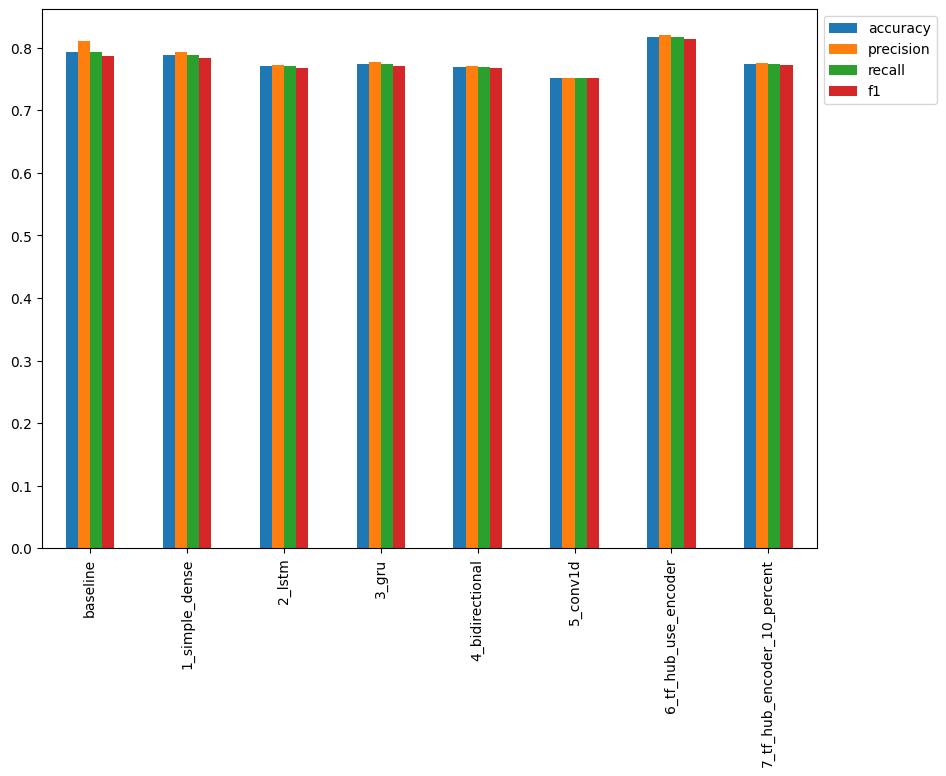

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

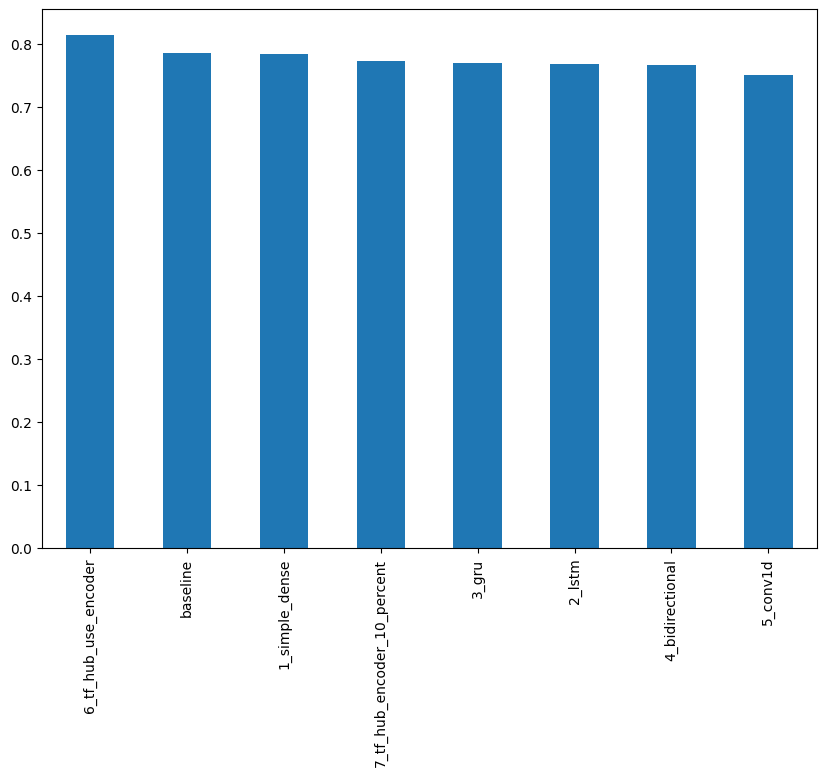

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# View TensorBoard logs of transfer learning modelling experiments (plus all of our other models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP Modelling Experiments"\
  --description "Comparing  multiple different types of model architecture on the Kaggle Tweets text classification dataset."\
  --one_shot # exit the uploader


2024-07-19 17:21:31.674813: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 17:21:31.674911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 17:21:31.677882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 17:21:33.013694: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb

Tensorboard is no longer supported :(

## Saving and loading a trained model

There are two main formats to save a model in TensorFlow:
1. The HDF5 format
2. The 'SavedModel' format (this is the default when using TensorFlow)

In [ ]:
# Save TF Hub Sentence Encorder model to HDF5 format
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load model with custom Hub Layer (requires HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})



In [ ]:
# How does our loaded model perform
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4245 - accuracy: 0.8163


[0.4244782030582428, 0.8162729740142822]

In [ ]:
# Save TF Hub Sentence Encorder model to SavedModel format
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load in a model from the SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate model in SavedModel format
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 20ms/step - loss: 0.4245 - accuracy: 0.8163


[0.4244782030582428, 0.8162729740142822]

## Find the most wrong examples

* if our best model still isn't perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting *most* wrong (those wil prediction probabilities closest to the opposite class)

For examples if a sample should have a label of 0 but our model predicts a prediction probility of 0.999 and vice versa.

In [ ]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2024-07-19 17:43:37--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.207, 74.125.139.207, 74.125.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  23.6MB/s    in 22s     

2024-07-19 17:43:59 (42.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [ ]:
# import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 17ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]   # False positive

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail()   # false negative

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")


Target: 0, Pred: 1.0, Prob: 0.9101957082748413
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769820332527161
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523001670837402
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272131681442261
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")


Target: 1, Pred: 0.0, Prob: 0.06730345636606216
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.055075839161872864
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.054603397846221924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.05459701269865036
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.04963730648159981
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.04391849413514137
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 0.

## Making predictions on the test dataset

In [ ]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))   # Our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text: \n{test_sample}\n")
  print(f"-----\n")

1/1 [==============================] - 0s 330ms/step
Pred: 0, Prob: 0.10592575371265411
Text: 
when you get stuck on the wicked twister and they have to call maintenance to get you out.. http://t.co/7iFPMFssMU

-----

1/1 [==============================] - 0s 99ms/step
Pred: 0, Prob: 0.08113163709640503
Text: 
@Jethro_Harrup How many Hangarback Walkers does your opponent need to have before you board in Infinite Obliteration?

-----

1/1 [==============================] - 0s 74ms/step
Pred: 1, Prob: 0.9232078194618225
Text: 
Heat Wave: A Social Autopsy of Disaster in Chicago by Klinenberg Eric http://t.co/fPtqxVokJC http://t.co/0gt63uQGcU

-----

1/1 [==============================] - 0s 61ms/step
Pred: 1, Prob: 0.5788106918334961
Text: 
Amazing how smug this guy is about the use of mass murder as a global power play. https://t.co/AlTTBJy8B9

-----

1/1 [==============================] - 0s 63ms/step
Pred: 1, Prob: 0.8941212296485901
Text: 
Saturday Night Massacre ? 25 Years Later #Tom

## The speed/score tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred


In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                                                                                  samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred


24/24 [==============================] - 0s 11ms/step


(0.39323246399999334, 0.000516053102362196)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.05403607399966859, 7.091348293919763e-05)

In [ ]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                                                                      y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

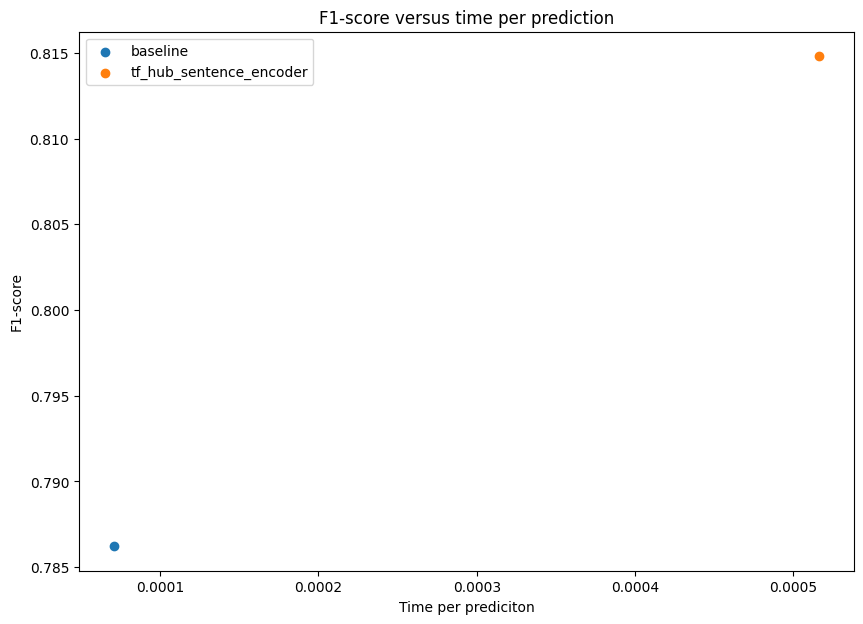

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediciton")
plt.ylabel("F1-score");

In [ ]:
import shutil
shutil.make_archive('/content/all_files', 'zip', '/content/directory_to_compress')


'/content/all_files.zip'

In [ ]:
import shutil

# Create a ZIP archive of the entire content folder
shutil.make_archive('content_backup', 'zip', '/content')

# Download the ZIP file
from google.colab import files
files.download('content_backup.zip')
